In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing (1).csv


In [0]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df=pd.read_csv("housing.csv",header=None, delimiter=r"\s+",names=column_names)

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


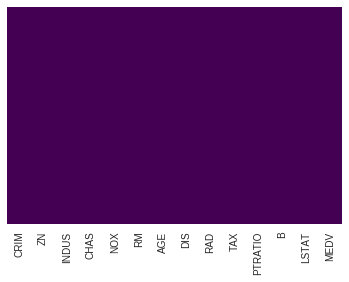

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


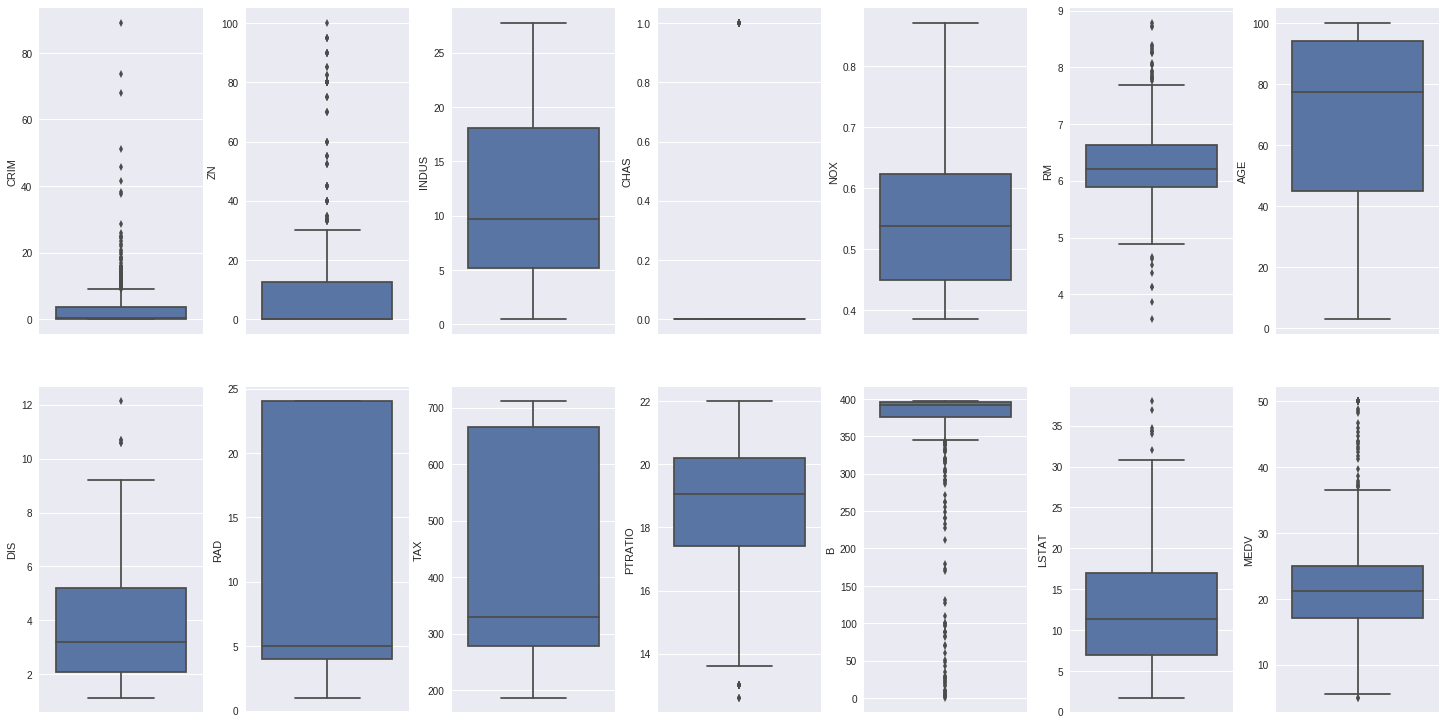

In [11]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [0]:
data=df.values

In [0]:
X = data[:,0:13]
Y = data[:,13]

In [0]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [0]:
seed = 7
np.random.seed(seed)
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

In [17]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -32.50 (23.36) MSE


#  Modeling The Standardized Dataset

In [18]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -29.28 (27.79) MSE


# Evaluate Larger network

In [0]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [20]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Larger: -22.37 (26.57) MSE


# Wider Network Topology

In [0]:
def wider_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [22]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: -22.59 (29.58) MSE


# Model That OverFits


In [0]:
def overfit_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(13, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [24]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize' , StandardScaler()))
estimators.append(('mlp' , KerasRegressor(build_fn = overfit_model , epochs = 50 , batch_size = 5 , verbose = 0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits = 10 , random_state = seed)
results = cross_val_score(pipeline , X , Y , cv = kfold)
print("Results: %2f(%2f)MSE"%(abs(results.mean()),results.std()))

Results: 21.602981(23.354850)MSE


# Model with some tuning

In [0]:
def tune_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1, activation='relu'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [26]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize' , StandardScaler()))
estimators.append(('mlp' , KerasRegressor(build_fn = tune_model , epochs = 50 , batch_size = 5 , verbose = 0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits = 10 , random_state = seed)
results = cross_val_score(pipeline , X , Y , cv = kfold)
print("Results: %2f(%2f)MSE"%(abs(results.mean()),results.std()))

Results: 22.703460(24.651573)MSE


# Functional Model

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
def functional_model():
  inputs = Input(shape = (13,))
  z1 = Dense(13, kernel_initializer="normal", activation='relu')(inputs)
  z2 = Dense(6, kernel_initializer="normal", activation='relu')(z1)
  outputs = Dense(1)(z2)
  model = Model(inputs,outputs)
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [28]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize' , StandardScaler()))
estimators.append(('mlp' , KerasRegressor(build_fn = functional_model , epochs = 50 , batch_size = 5 , verbose = 0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits = 10 , random_state = seed)
results = cross_val_score(pipeline , X , Y , cv = kfold)
print("Results: %2f(%2f)MSE"%(abs(results.mean()),results.std()))

Results: 21.966769(27.749739)MSE


# SubClass Model

In [0]:
import tensorflow as tf
class SubclassModel(tf.keras.Model):
    def __init__(self):
        super(SubclassModel,self).__init__()
        self.dense1= tf.keras.layers.Dense(13,activation=tf.nn.relu)
        self.dense2=tf.keras.layers.Dense(6,activation=tf.nn.relu)
        self.dense3= tf.keras.layers.Dense(1)
    def call(self,inputs):
        x=self.dense1(inputs)
        x=self.dense2(x)
        return self.dense3(x)
def finalModel():
    model=SubclassModel()
    model.compile(optimizer='adam', loss='mse' ,metrics=['mae'])
    return model

In [30]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize' , StandardScaler()))
estimators.append(('mlp' , KerasRegressor(build_fn = finalModel , epochs = 50 , batch_size = 5 , verbose = 0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits = 10 , random_state = seed)
results = cross_val_score(pipeline , X , Y , cv = kfold)
print("Results: %2f(%2f)MSE"%(abs(results.mean()),results.std()))

Results: 21.584808(22.427013)MSE


# Model without SciKit Learn

In [0]:
dataset = df.values

In [0]:
complete_data = dataset.copy()
data = complete_data[:,0:13]
labels = complete_data[:,13]
train_data = data[:404]
train_labels = labels[:404]
test_data = data[404:]
test_labels = labels[404:]

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [0]:
from keras import models
from keras import layers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [0]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []


In [38]:
model = build_model()
model.fit(train_data, train_labels,
epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print(test_mse_score)

102/102 [==============================] - 1s 11ms/step
35.21857011084463
